In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
data = pd.read_csv(r"D:\user\Downloads\gait.csv")

In [68]:
data.head()

,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127
2,1,1,1,1,1,2,5.229774
3,1,1,1,1,1,3,5.083273
4,1,1,1,1,1,4,4.652399


In [69]:
data.shape

(181800, 7)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181800 entries, 0 to 181799
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   subject      181800 non-null  int64  
 1   condition    181800 non-null  int64  
 2   replication  181800 non-null  int64  
 3   leg          181800 non-null  int64  
 4   joint        181800 non-null  int64  
 5   time         181800 non-null  int64  
 6   angle        181800 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 9.7 MB


In [71]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

1     18180
2     18180
3     18180
4     18180
5     18180
6     18180
7     18180
8     18180
9     18180
10    18180
Name: subject, dtype: int64
********************
1    60600
2    60600
3    60600
Name: condition, dtype: int64
********************
1     18180
2     18180
3     18180
4     18180
5     18180
6     18180
7     18180
8     18180
9     18180
10    18180
Name: replication, dtype: int64
********************
1    90900
2    90900
Name: leg, dtype: int64
********************
1    60600
2    60600
3    60600
Name: joint, dtype: int64
********************
0      1800
64     1800
74     1800
73     1800
72     1800
       ... 
31     1800
30     1800
29     1800
28     1800
100    1800
Name: time, Length: 101, dtype: int64
********************
 4.682881     1
 4.967225     1
 23.436764    1
 23.425487    1
 23.429408    1
             ..
 0.448269     1
-0.597423     1
-1.778090     1
-2.883342     1
 28.136438    1
Name: angle, Length: 181800, dtype: int64
******************

In [72]:
data.isna().sum()

subject        0
condition      0
replication    0
leg            0
joint          0
time           0
angle          0
dtype: int64

In [73]:
data.describe()

,subject,condition,replication,leg,joint,time,angle
count,181800.000000,181800.000000,181800.000000,181800.000000,181800.000000,181800.00000,181800.000000
mean,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,12.149321
std,2.872289,0.816499,2.872289,0.500001,0.816499,29.15484,16.025823
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,-27.004634
25%,3.000000,1.000000,3.000000,1.000000,1.000000,25.00000,1.794457
50%,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,9.466976
75%,8.000000,3.000000,8.000000,2.000000,3.000000,75.00000,18.559890
max,10.000000,3.000000,10.000000,2.000000,3.000000,100.00000,78.309342


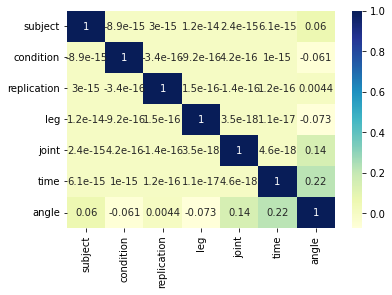

In [74]:
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'subject'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'replication'}>],
       [<AxesSubplot:title={'center':'leg'}>,
        <AxesSubplot:title={'center':'joint'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'angle'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

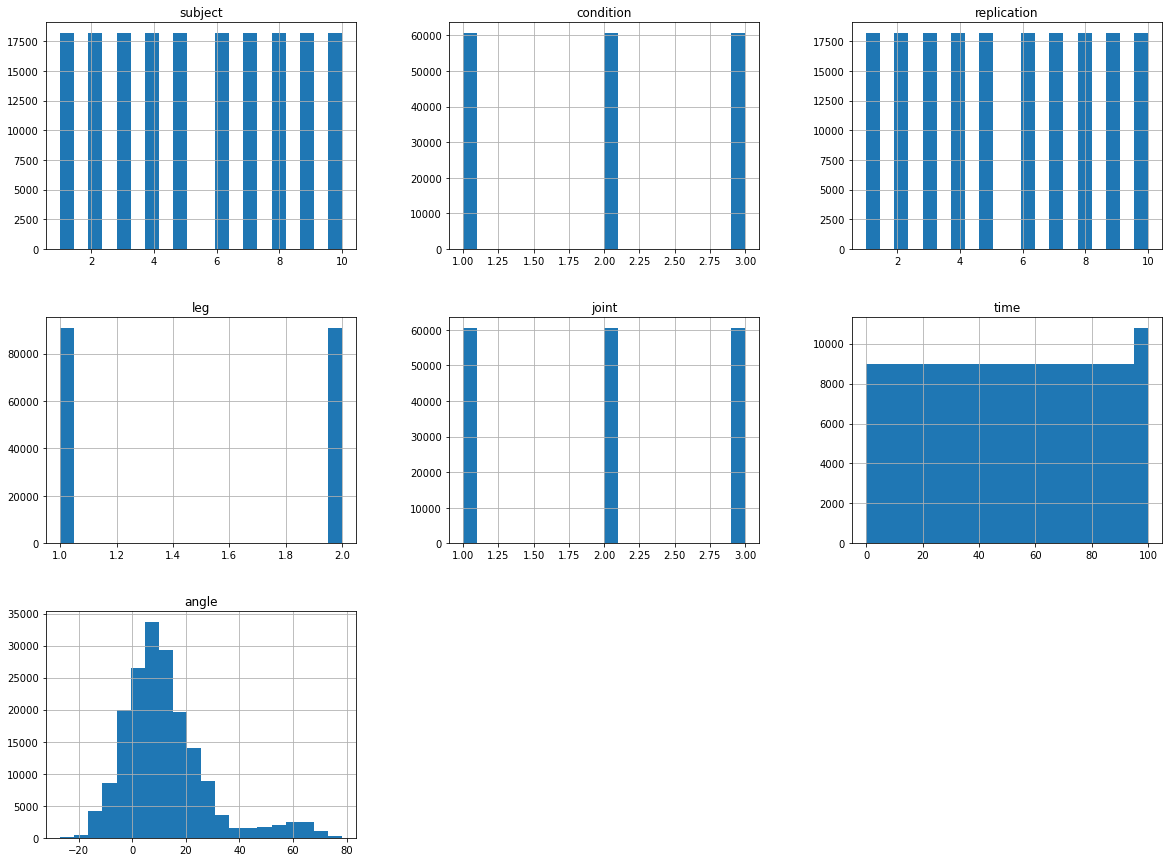

In [75]:
data.hist(bins=20, figsize=(20 ,15))

array([[<AxesSubplot:xlabel='subject', ylabel='subject'>,
        <AxesSubplot:xlabel='condition', ylabel='subject'>,
        <AxesSubplot:xlabel='replication', ylabel='subject'>,
        <AxesSubplot:xlabel='leg', ylabel='subject'>,
        <AxesSubplot:xlabel='joint', ylabel='subject'>,
        <AxesSubplot:xlabel='time', ylabel='subject'>,
        <AxesSubplot:xlabel='angle', ylabel='subject'>],
       [<AxesSubplot:xlabel='subject', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>,
        <AxesSubplot:xlabel='replication', ylabel='condition'>,
        <AxesSubplot:xlabel='leg', ylabel='condition'>,
        <AxesSubplot:xlabel='joint', ylabel='condition'>,
        <AxesSubplot:xlabel='time', ylabel='condition'>,
        <AxesSubplot:xlabel='angle', ylabel='condition'>],
       [<AxesSubplot:xlabel='subject', ylabel='replication'>,
        <AxesSubplot:xlabel='condition', ylabel='replication'>,
        <AxesSubplot:xlabel='replication', ylabel='repli

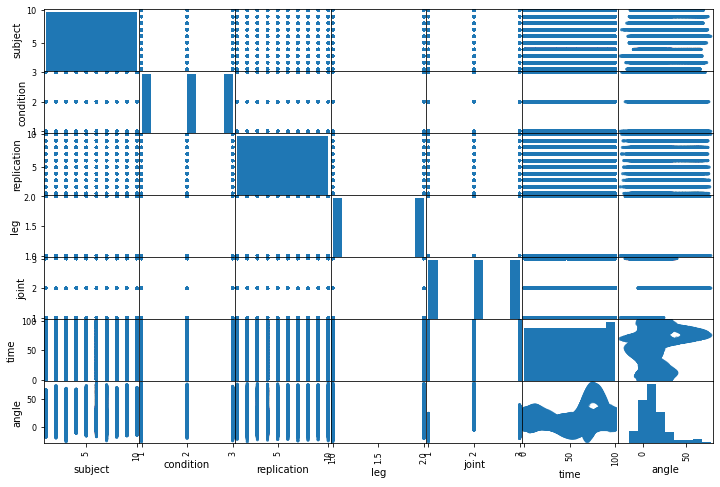

In [76]:
scatter_matrix(data[data.columns], figsize=(12,8))

<AxesSubplot:xlabel='time', ylabel='angle'>

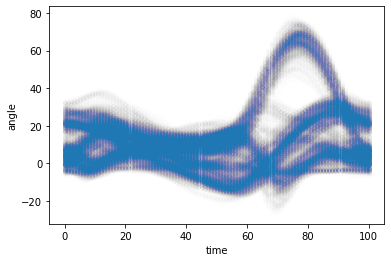

In [77]:
data.plot(kind='scatter', x='time', y='angle', alpha=0.002)

In [78]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4,random_state=0)

In [79]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predicted=reg.predict(X_test)
y_train_predicted=reg.predict(X_train)
print("mse: ", mean_squared_error(y_test, y_predicted))
print("rmse: ", math.sqrt(mean_squared_error(y_test, y_predicted)))
print("mae: ", mean_absolute_error(y_test, y_predicted))
print("training acc: ", r2_score(y_train,y_train_predicted))
print("testing acc: ", r2_score(y_test,y_predicted))

mse:  4.131500394471915e-29
rmse:  6.4276748474638285e-15
mae:  5.560202097056708e-15
training acc:  1.0
testing acc:  1.0


In [80]:
rand_forest_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
rand_forest_model.fit(X_train, y_train)
y_predicted=reg.predict(X_test)
y_train_predicted=reg.predict(X_train)
print("mse: ", mean_squared_error(y_test, y_predicted))
print("rmse: ", math.sqrt(mean_squared_error(y_test, y_predicted)))
print("mae: ", mean_absolute_error(y_test, y_predicted))
print("training acc: ", r2_score(y_train,y_train_predicted))
print("testing acc: ", r2_score(y_test,y_predicted))

mse:  4.131500394471915e-29
rmse:  6.4276748474638285e-15
mae:  5.560202097056708e-15
training acc:  1.0
testing acc:  1.0


In [83]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_predicted=reg.predict(X_test)
y_train_predicted=reg.predict(X_train)
print("mse: ", mean_squared_error(y_test, y_predicted))
print("rmse: ", math.sqrt(mean_squared_error(y_test, y_predicted)))
print("mae: ", mean_absolute_error(y_test, y_predicted))
print("training acc: ", r2_score(y_train,y_train_predicted))
print("testing acc: ", r2_score(y_test,y_predicted))

mse:  4.131500394471915e-29
rmse:  6.4276748474638285e-15
mae:  5.560202097056708e-15
training acc:  1.0
testing acc:  1.0
